# Titanic Survival Prediction data science project

This file is meant to explain the different steps of this project.

In [1]:
# Import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


### Loading the data
Here the data (that comes from Kaggle) is already split into two datasets:
- **train** is meant for training
- **test** is meant for testing

In [2]:
# Importing the dataset
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

## **Exploratory Data Analysis (EDA)**

The EDA is usefull to get an overview of the data provided: get a look at the first few rows, the different types, missing values...
It is also useful to create visualisations, to analyse the correlation between the different columns. In this case, how age, gender, passenger class, etc. affects the survival rates.
Useful to have an idea of the ranges of the variables to identify outliers.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Notice training and test are built the same way. That was expected. The following data analysis will therefore be done on the training dataset only. We should be able to expect the same range of results in the testing dataset. 

If the model predictions are very efficient on the training dataset but only little on the testing dataset, we might have to go back to data analysis on the testing dataset (of course there can be other reasons explaining such results: overfitting...).

In [5]:
print("Summary of the columns, emptiness and types")
train.info()
print()
print("-------")
print()
print("Summary statistics for numerical columns ")
train.describe()

Summary of the columns, emptiness and types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

-------

Summary statistics for numerical columns 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Data Cleaning and Preprocessing**

#### Dealing with missing values

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarked columns have missing values. There are different ways to tackle the issue.
- The first one is to drop the rows with missing values. This leads to loss of data, but in a large dataset, dropping a few rows isn't as consequent as it is for a small dataset.
- The second one is to inpute the missing data. Either with the mean of the corresponding value, or with a constant value.
- The third one is to use classification or regression models to fill in the missing data.

To have more insights on the correlation of survival rates and other data, we'll do some data visualisation.

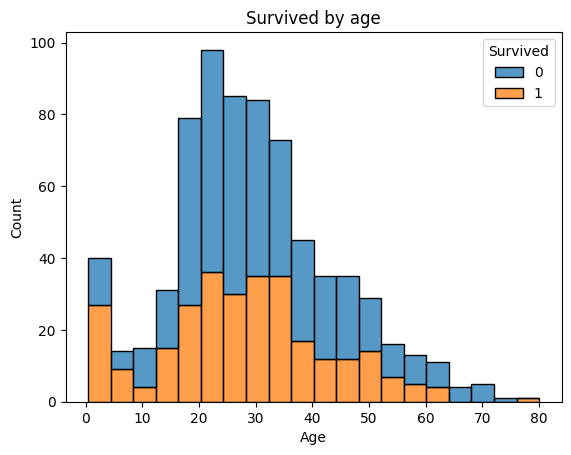

In [7]:
sns.histplot(data=train, x='Age', hue='Survived', multiple='stack')
plt.title('Survived by age')

plt.savefig("./data_analysis_plots/survived_by_age")

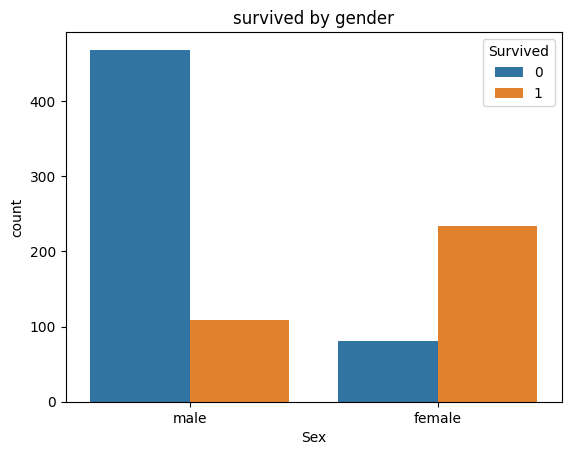

In [8]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('survived by gender')
plt.savefig("./data_analysis_plots/survived_by_sex")

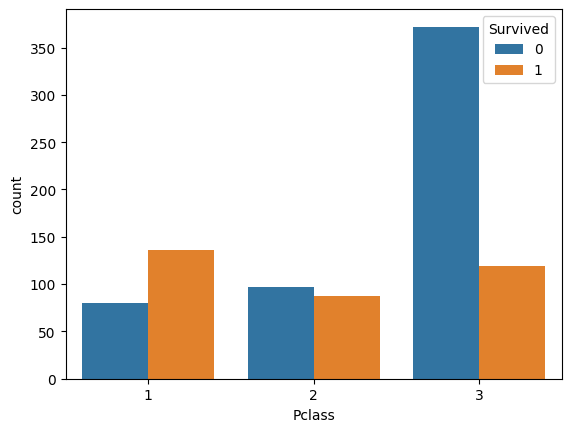

In [9]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.savefig("./data_analysis_plots/survived_by_passenger_class")

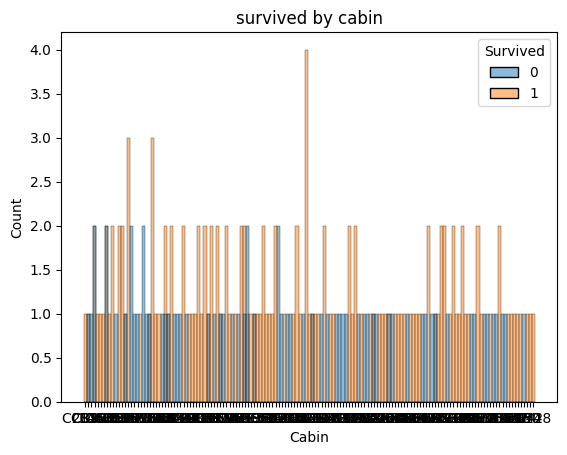

In [10]:
sns.histplot(data=train, x='Cabin', hue='Survived')
plt.title('survived by cabin')
plt.savefig("./data_analysis_plots/survived_by_cabin")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

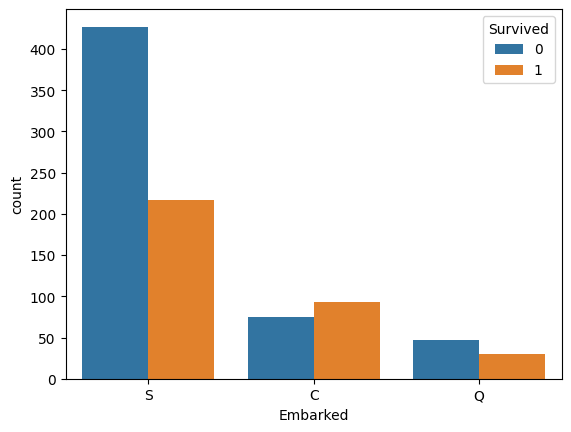

In [11]:
sns.countplot(data=train, x='Embarked', hue='Survived')

The plots show the age, gender and passenger class are important for the survived outcome, meanwhile the cabin data isn't complete enough to draw conclusions. It might eventually result in granularity loss of the predictive model, but we'll chose to discard this column. 

To confirm this data cleaning, we proceed by doing a correlation heatmap. This will allow us to have an overview on which data has the most impact on survival rates. 
To do this, we must convert categorical data: this means converting columns like sex and embark to numerical values.
What we will do is this:

**Sex**
- Female -> 1
- Male -> 0

**Embarked**
- S -> 0
- C -> 1
- Q -> 2

<AxesSubplot:>

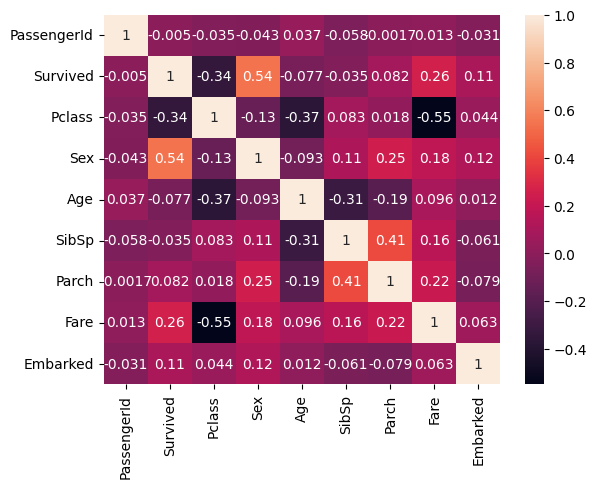

In [12]:
train_tmp = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
train_tmp['Sex'] = train_tmp['Sex'].map({'male':0, 'female':1})
train_tmp['Embarked'] = train_tmp['Embarked'].map({'S':0, 'C':1, 'Q':2})


sns.heatmap(train_tmp.corr(), annot=True)

### Heatmap -variable correlation- analysis

#### Theoretical explanations
First of all, correlation ranges from -1 to 1.
Then, the closer the value is from -1 or 1, the higher the correlation is, between the variables.
For positive numbers, if one increase, the other does too.
For negative numbers, if one decreases, the other increases.

#### Analysis of the heatmap results
The following variables are ordered by descending order of correlation, for both positive and negative values.

**Positive Values**:
- Sex
- Fare
- Embarked
- Parch - _Negligible (at first at least)_

**Negative Values**:
- Passenger class
- Age - _Negligible (at first at least)_
- Sibsp - _Negligible (at first at least)_

#### Feature engineering

We could also be tempted to join Sibsp and Parch to create a family to gain in granularity.
We will keep that idea aside for now, but may get back to it.


Here, we will:
- drop the missing embarked rows (2 rows, negligible loss of data).
- fill in empty age fields with the mean age of passengers

In [13]:
# Keep the columns we need for the model
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})

# Drop rows with missing Embraked values
train = train.dropna(subset=['Embarked'])

# Fill missing age values with the mean
train['Age'] = train['Age'].fillna(train['Age'].mean())

train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

The data should now be clean, and ready to be processed by the model.
It is now time to choose the adapted predictive model.

Since the purpose of this project is to gain skills in model building and tuning, we will build several of them.
Then, we will make an analysis of the results, and cross validate the results. We should then be able to determine which model suits the best.

For now, let's start with Linear Regression.

## **Linear Regression** ##